In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
dataframe=pd.read_csv("/work/Colaboratory-Notes/DeepNoteEDA/listings.csv.gz")
df=dataframe

In [ ]:
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20210409161549,2021-04-12,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,https://www.airbnb.com/users/show/3159,...,10.0,9.0,10.0,NaN,t,1,0,1,0,1.90
1,20168,https://www.airbnb.com/rooms/20168,20210409161549,2021-04-12,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,Located just in between famous central canals....,https://a0.muscache.com/pictures/69979628/fd6a...,59484,https://www.airbnb.com/users/show/59484,...,10.0,10.0,9.0,0363 CBB3 2C10 0C2A 1E29,t,2,0,2,0,2.50
2,25428,https://www.airbnb.com/rooms/25428,20210409161549,2021-04-11,"Lovely, 1 bed apt in Ctr (w.lift) -3/20-6/20(f...",Lovely apt in Centre ( lift & fireplace) near ...,NaN,https://a0.muscache.com/pictures/138431/7079a9...,56142,https://www.airbnb.com/users/show/56142,...,10.0,10.0,10.0,NaN,f,2,2,0,0,0.13
3,27886,https://www.airbnb.com/rooms/27886,20210409161549,2021-04-11,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,"Central, quiet, safe, clean and beautiful.",https://a0.muscache.com/pictures/02c2da9d-660e...,97647,https://www.airbnb.com/users/show/97647,...,10.0,10.0,10.0,0363 974D 4986 7411 88D8,t,1,0,1,0,1.94
4,28871,https://www.airbnb.com/rooms/28871,20210409161549,2021-04-13,Comfortable double room,<b>The space</b><br />In a monumental house ri...,"Flower market , Leidseplein , Rembrantsplein",https://a0.muscache.com/pictures/160889/362340...,124245,https://www.airbnb.com/users/show/124245,...,10.0,10.0,10.0,0363 607B EA74 0BD8 2F6F,f,2,0,2,0,2.59


In [ ]:
df['price'] = df['price'].str.replace('$', '')
df['price'] = df['price'].str.replace(',', '')
df['price'] = pd.to_numeric(df['price'])
print(df["price"])

0         59.0
1        200.0
2        125.0
3        141.0
4         75.0
         ...  
17820     47.0
17821    200.0
17822    112.0
17823    107.0
17824     94.0
Name: price, Length: 17825, dtype: float64
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


,review_scores_location,price
review_scores_location,1.00000,0.06341
price,0.06341,1.00000


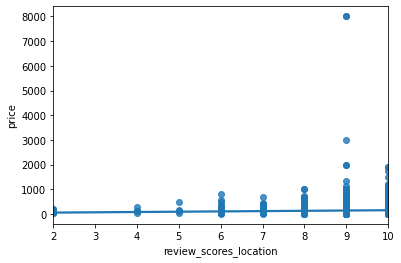

In [ ]:
sns.regplot(x="review_scores_location", y="price", data=df)
df[["review_scores_location", "price"]].corr()


,beds,price
beds,1.000000,0.251083
price,0.251083,1.000000


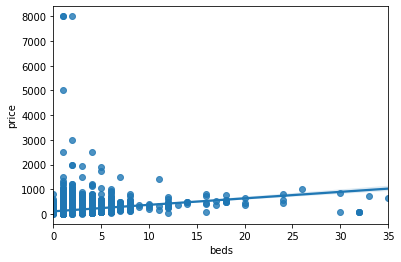

In [ ]:
sns.regplot(x="beds", y="price", data=df)
df[["beds", "price"]].corr()

In [ ]:
large_price=df[df.price > 3000]
large_price


,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
83,258273,https://www.airbnb.com/rooms/258273,20210409161549,2021-04-11,Great CENTRAL apartment De Pijp,<b>The space</b><br />This is a lovely comfort...,NaN,https://a0.muscache.com/pictures/9895329/f0f22...,1358307,https://www.airbnb.com/users/show/1358307,...,9.0,9.0,8.0,NaN,f,1,1,0,0,0.07
4271,9818537,https://www.airbnb.com/rooms/9818537,20210409161549,2021-04-10,Nice&Lovely Apartment in Amsterdam,<b>The space</b><br />This apartment of 60m² h...,"Our apartment is located in Amsterdam Oost, on...",https://a0.muscache.com/pictures/2002c2cd-9c3c...,40135760,https://www.airbnb.com/users/show/40135760,...,10.0,9.0,9.0,NaN,t,1,1,0,0,0.36
9206,19686192,https://www.airbnb.com/rooms/19686192,20210409161549,2021-04-10,diervriendelijk appartementje aan rand Amsterdam,maisonette op 3e woonlaag<br />woonkamer incl ...,Ijburg is een nieuwe wijk gebouwd in/op het w...,https://a0.muscache.com/pictures/7bceb44a-b464...,138283471,https://www.airbnb.com/users/show/138283471,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
10459,21946106,https://www.airbnb.com/rooms/21946106,20210409161549,2021-04-10,Modern appartment with canal view in city center,Our monumental apartment is located at the rim...,Right in the middle of the lively city centre<...,https://a0.muscache.com/pictures/c5b5456e-9e2d...,12583042,https://www.airbnb.com/users/show/12583042,...,NaN,NaN,NaN,NaN,f,1,1,0,0,0.02


In [ ]:
lower_prices=df[df.price < 2000]
lower_prices

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20210409161549,2021-04-12,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,https://www.airbnb.com/users/show/3159,...,10.0,9.0,10.0,NaN,t,1,0,1,0,1.90
1,20168,https://www.airbnb.com/rooms/20168,20210409161549,2021-04-12,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,Located just in between famous central canals....,https://a0.muscache.com/pictures/69979628/fd6a...,59484,https://www.airbnb.com/users/show/59484,...,10.0,10.0,9.0,0363 CBB3 2C10 0C2A 1E29,t,2,0,2,0,2.50
2,25428,https://www.airbnb.com/rooms/25428,20210409161549,2021-04-11,"Lovely, 1 bed apt in Ctr (w.lift) -3/20-6/20(f...",Lovely apt in Centre ( lift & fireplace) near ...,NaN,https://a0.muscache.com/pictures/138431/7079a9...,56142,https://www.airbnb.com/users/show/56142,...,10.0,10.0,10.0,NaN,f,2,2,0,0,0.13
3,27886,https://www.airbnb.com/rooms/27886,20210409161549,2021-04-11,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,"Central, quiet, safe, clean and beautiful.",https://a0.muscache.com/pictures/02c2da9d-660e...,97647,https://www.airbnb.com/users/show/97647,...,10.0,10.0,10.0,0363 974D 4986 7411 88D8,t,1,0,1,0,1.94
4,28871,https://www.airbnb.com/rooms/28871,20210409161549,2021-04-13,Comfortable double room,<b>The space</b><br />In a monumental house ri...,"Flower market , Leidseplein , Rembrantsplein",https://a0.muscache.com/pictures/160889/362340...,124245,https://www.airbnb.com/users/show/124245,...,10.0,10.0,10.0,0363 607B EA74 0BD8 2F6F,f,2,0,2,0,2.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17820,49085366,https://www.airbnb.com/rooms/49085366,20210409161549,2021-04-11,Kloveniers Studio,Great studio to enjoy a couple of days in Amst...,An oasis of calm in the middle of the city of ...,https://a0.muscache.com/pictures/f306ad6d-aa82...,395882585,https://www.airbnb.com/users/show/395882585,...,NaN,NaN,NaN,0363 B62C 0694 FC6B 277F,t,1,0,1,0,NaN
17821,49089176,https://www.airbnb.com/rooms/49089176,20210409161549,2021-04-11,"Prachtig, gerenoveerd appartement in de Pijp!",Dit volledig gerenoveerde appartement is gesch...,NaN,https://a0.muscache.com/pictures/0692f782-b1b3...,68481315,https://www.airbnb.com/users/show/68481315,...,NaN,NaN,NaN,0363 A169 C048 6ED8 1C00,t,1,1,0,0,NaN
17822,49101225,https://www.airbnb.com/rooms/49101225,20210409161549,2021-04-12,Beautiful luxury loft close to city centre,"THIS APARTMENT IS IN TRANSVAALBUURT: ""HAPPY NE...","The apartment is in Transvaalbuurt, a characte...",https://a0.muscache.com/pictures/195f53ba-8e82...,23204045,https://www.airbnb.com/users/show/23204045,...,NaN,NaN,NaN,03631DCF0C172B758647,f,1,1,0,0,NaN
17823,49102514,https://www.airbnb.com/rooms/49102514,20210409161549,2021-04-11,Cedo Nulli Dutch Holiday Boats,Brand new holiday boats with free parking loca...,Marina het Bosch is ideally located in Amsterd...,https://a0.muscache.com/pictures/prohost-api/H...,26206455,https://www.airbnb.com/users/show/26206455,...,NaN,NaN,NaN,Exempt,t,1,1,0,0,NaN


,review_scores_location,price
review_scores_location,1.00000,0.10013
price,0.10013,1.00000


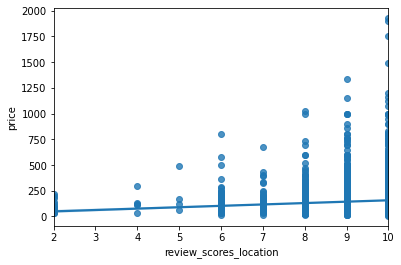

In [ ]:
sns.regplot(x="review_scores_location", y="price", data=lower_prices)
lower_prices[["review_scores_location", "price"]].corr()

<AxesSubplot:xlabel='neighbourhood_cleansed', ylabel='price'>

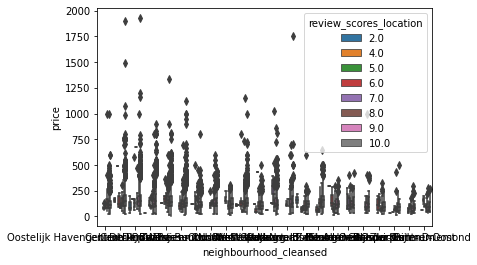

In [ ]:
sns.boxplot(x="neighbourhood_cleansed", y="price", data=lower_prices, hue="review_scores_location")

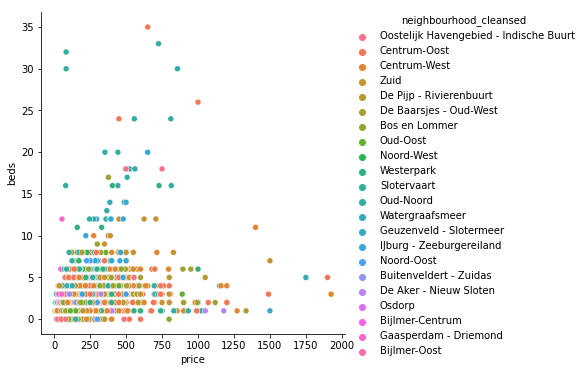

In [ ]:
sns.relplot(x="price", y="beds", hue="neighbourhood_cleansed", data=lower_prices);

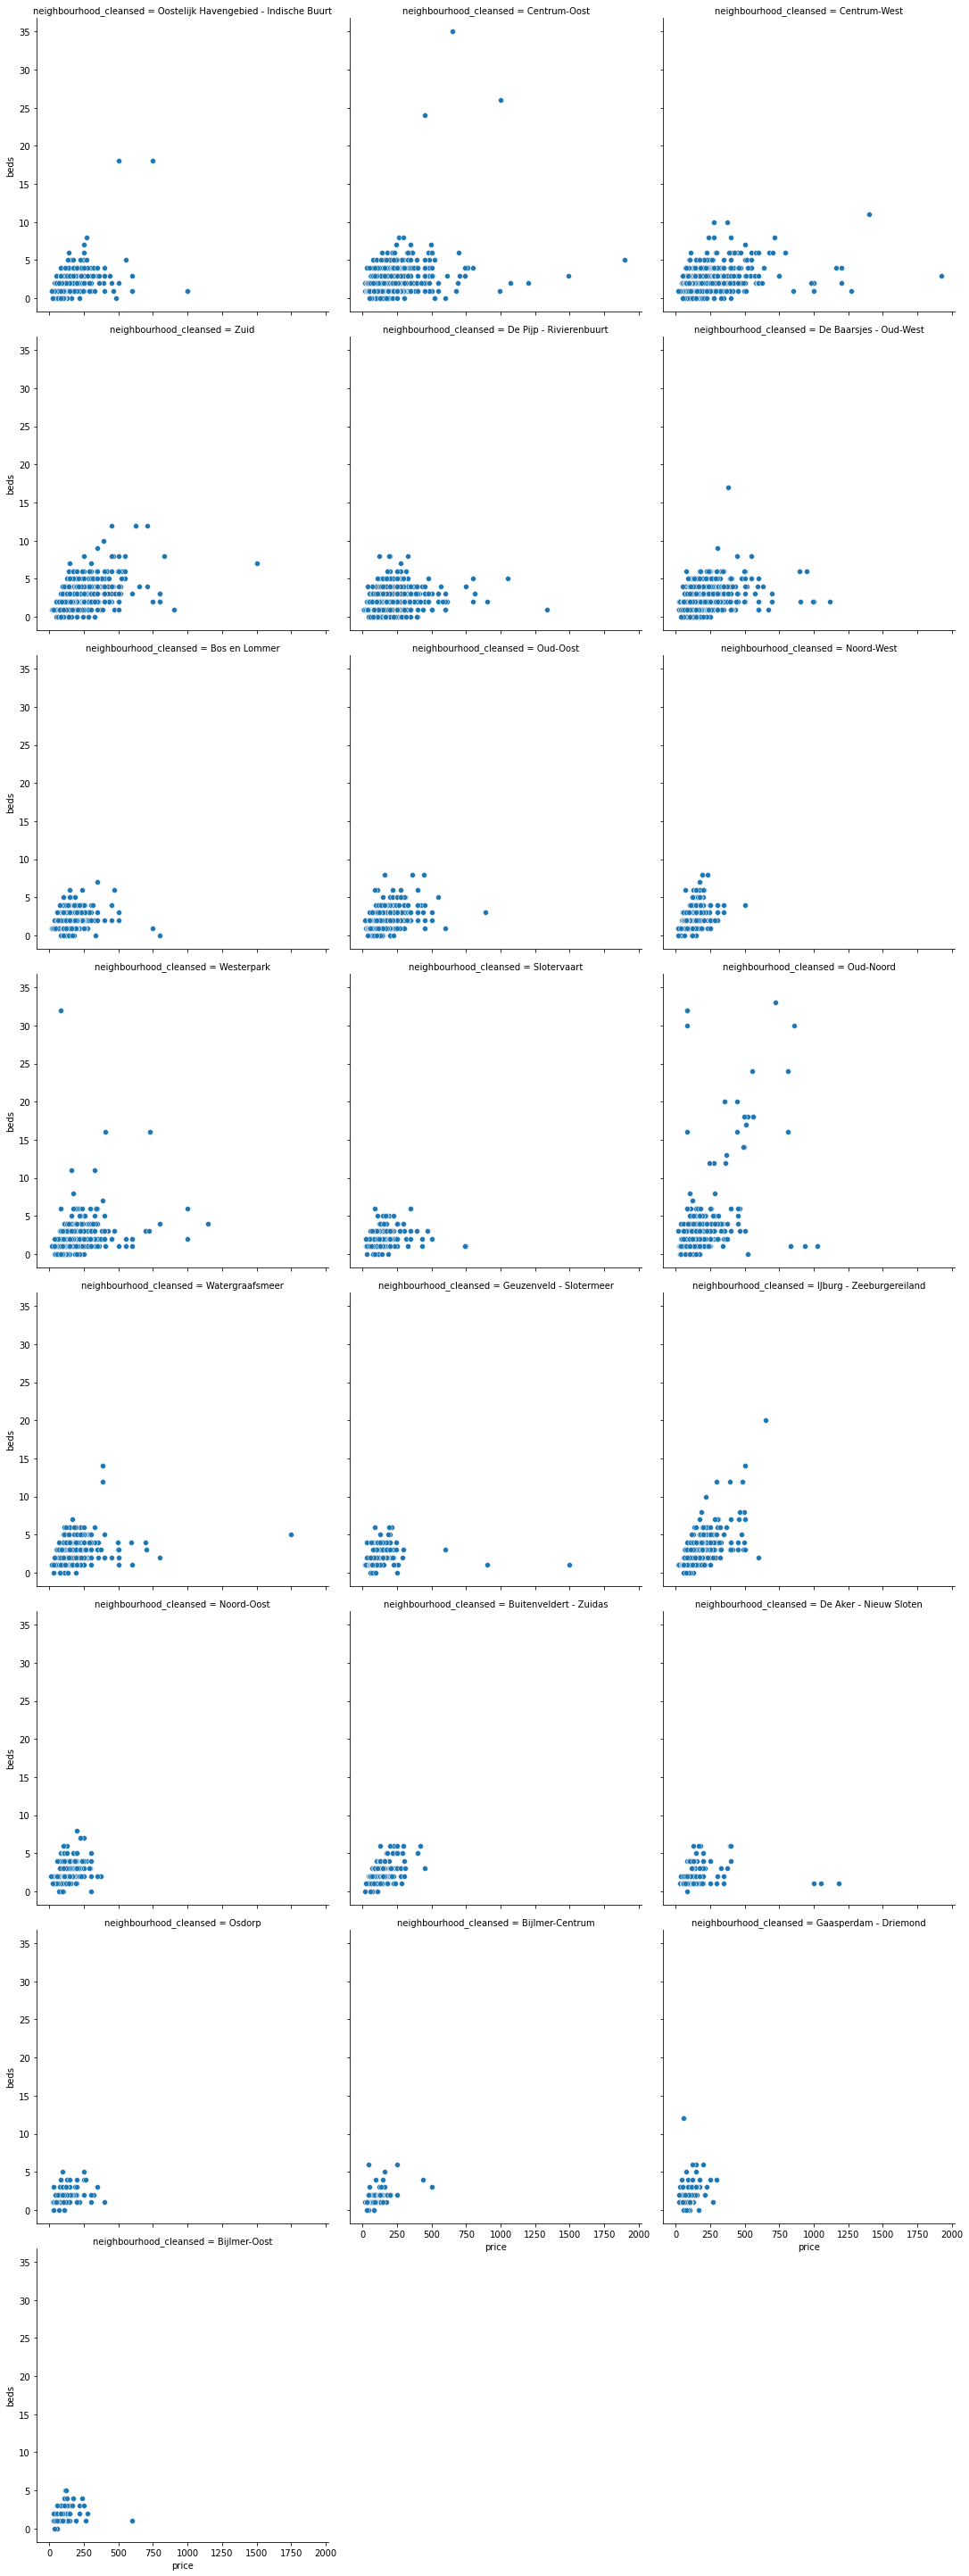

In [ ]:
sns.relplot(x="price", y="beds", col="neighbourhood_cleansed", col_wrap=3, data=lower_prices);

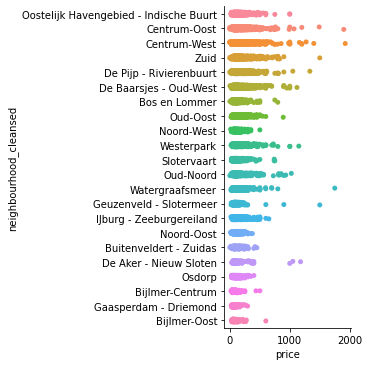

In [ ]:
sns.catplot(x="price", y="neighbourhood_cleansed", data=lower_prices)

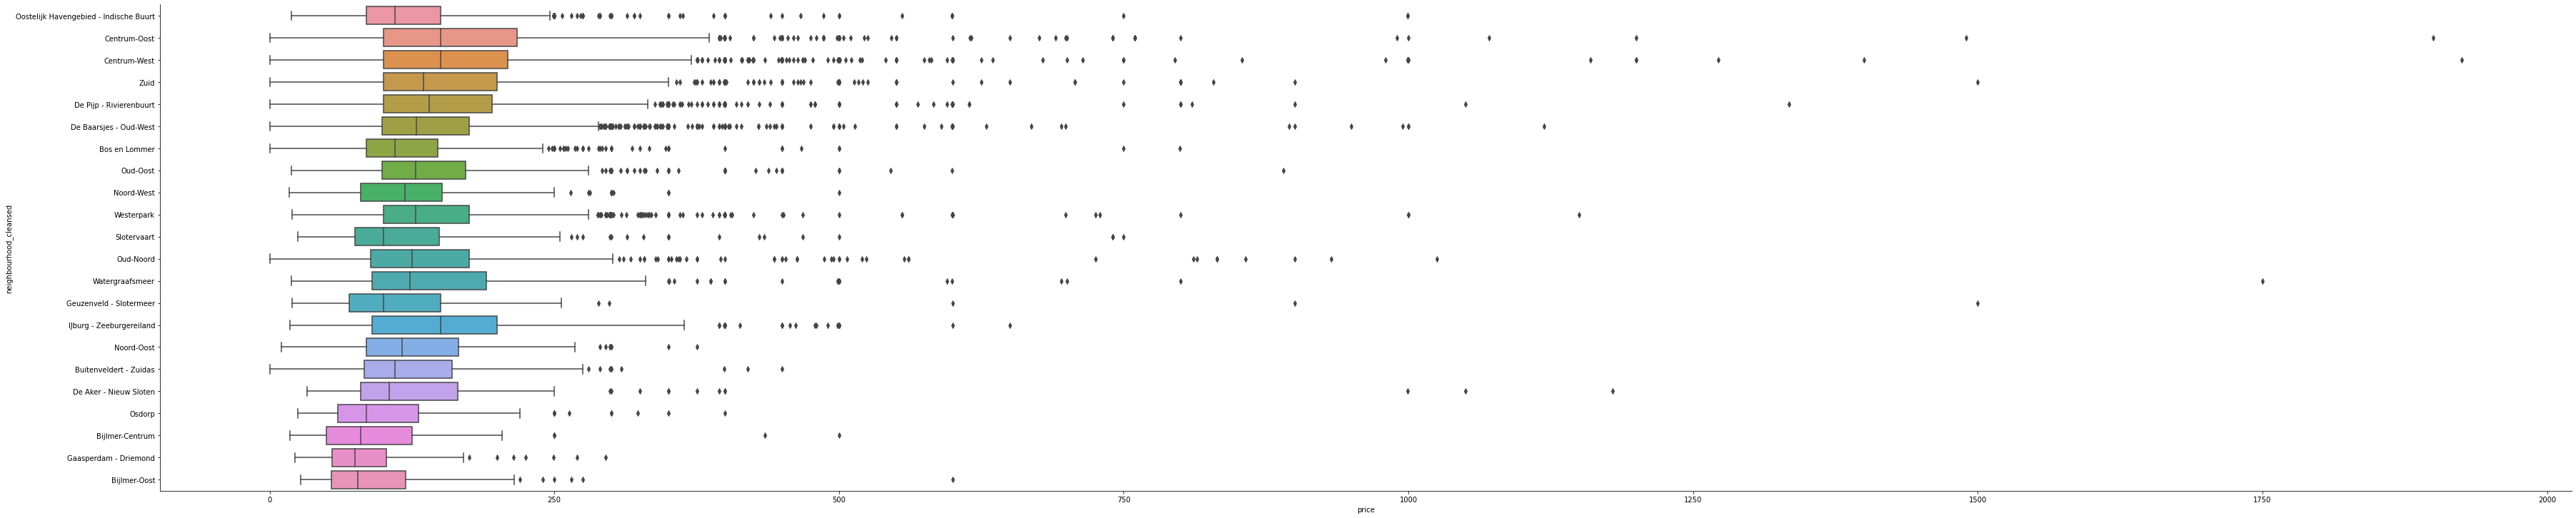

In [ ]:
sns.catplot(x="price", y="neighbourhood_cleansed", kind="box", aspect=5, height=10,data=lower_prices)


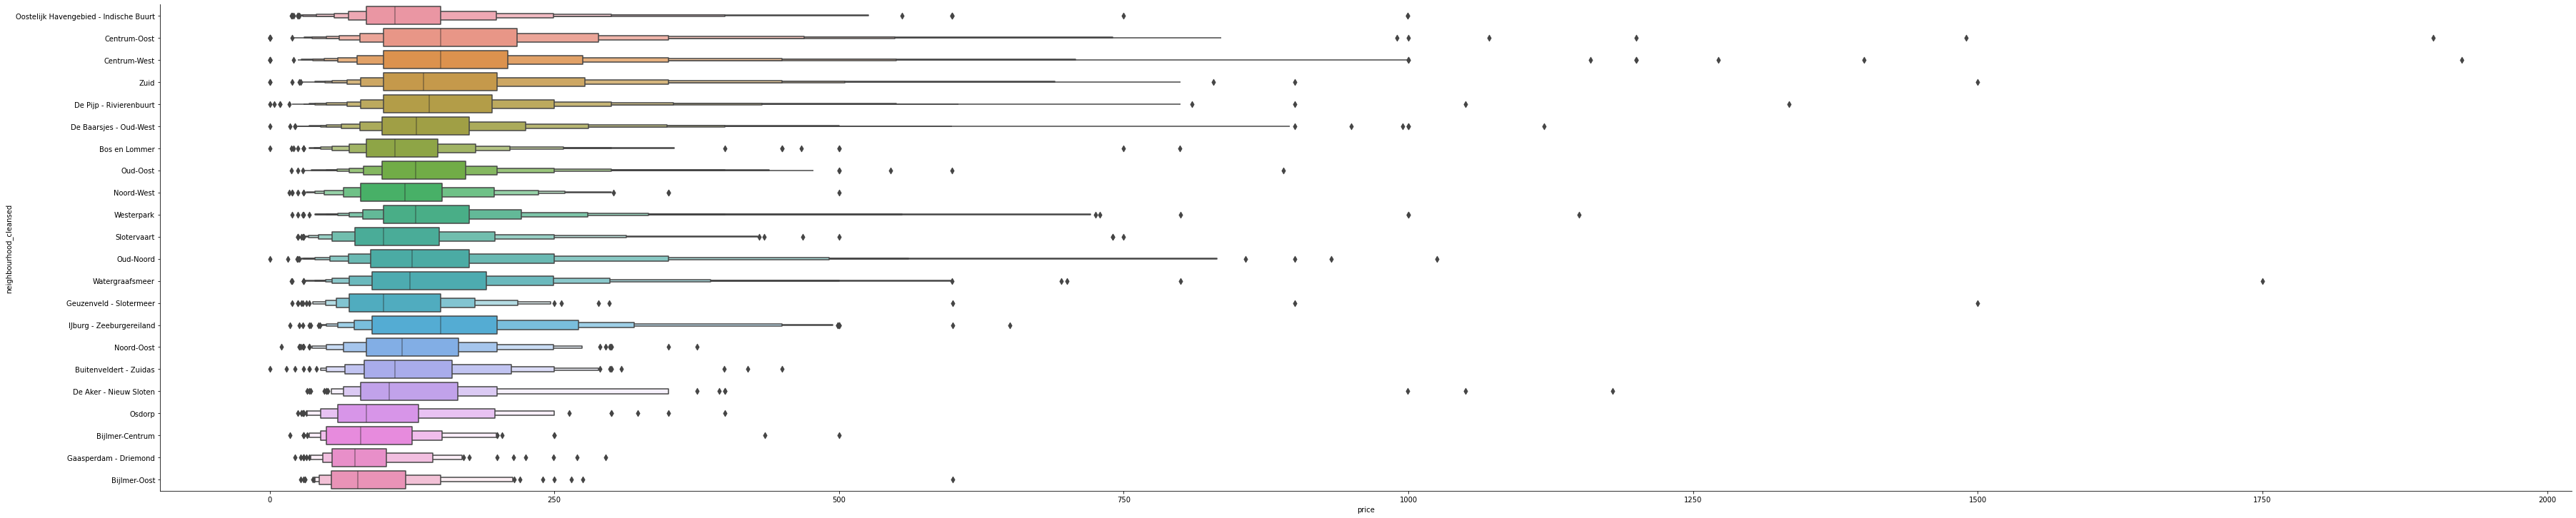

In [ ]:
sns.catplot(x="price", y="neighbourhood_cleansed", kind="boxen", aspect=5, height=10,data=lower_prices)


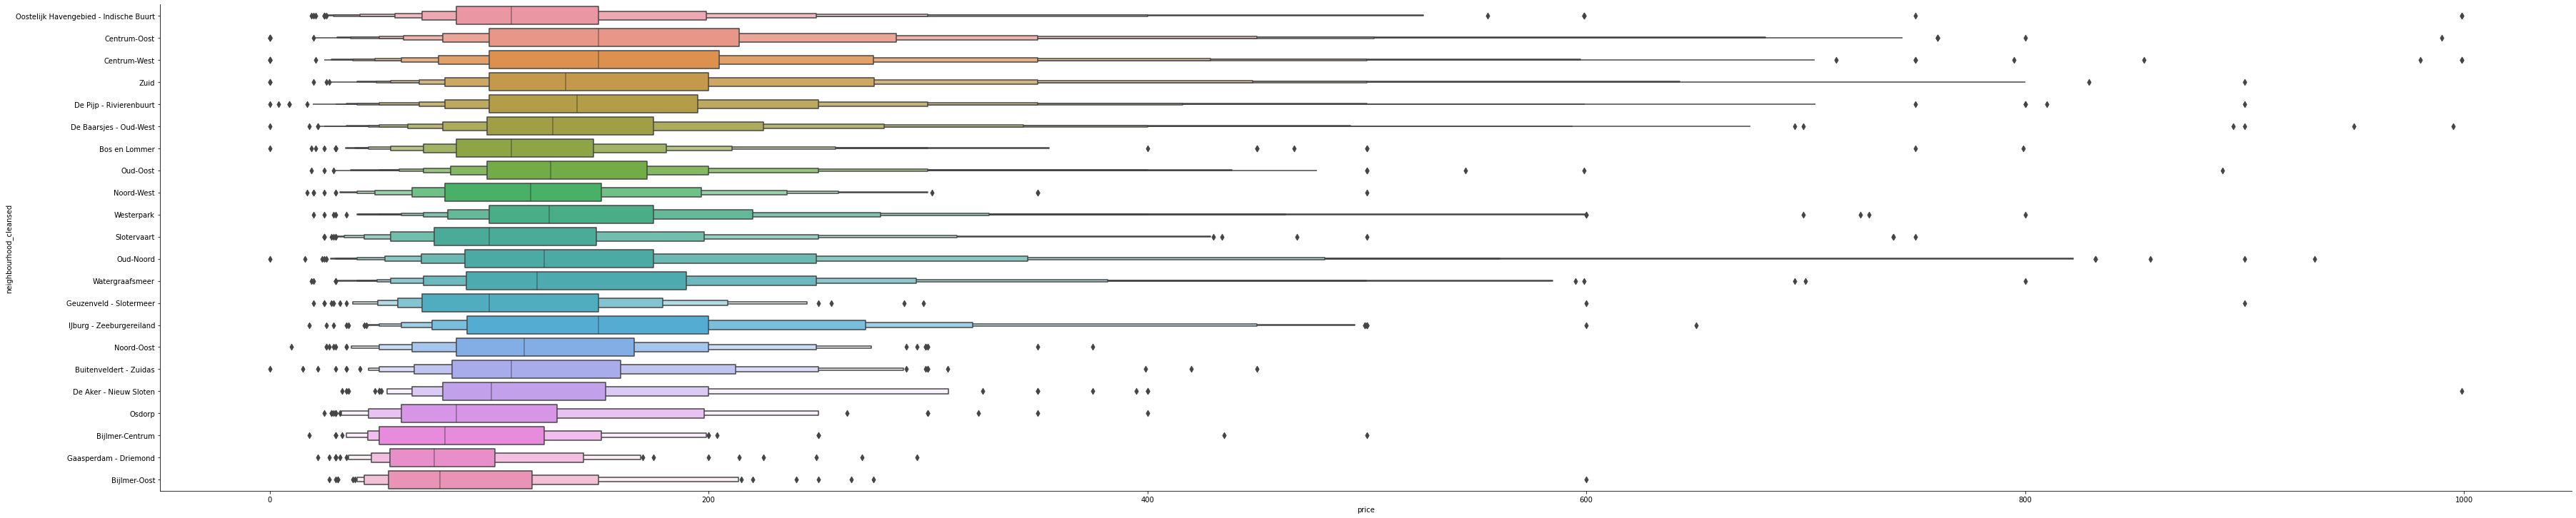

In [ ]:
lowest_prices=df[df.price < 1000]
sns.catplot(x="price", y="neighbourhood_cleansed", kind="boxen", aspect=5, height=10,data=lowest_prices)


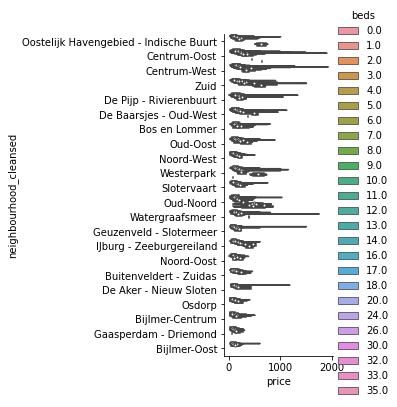

In [ ]:
sns.catplot(x="price", y="neighbourhood_cleansed", hue="beds", kind="violin", bw=.15, cut=0,data=lower_prices)

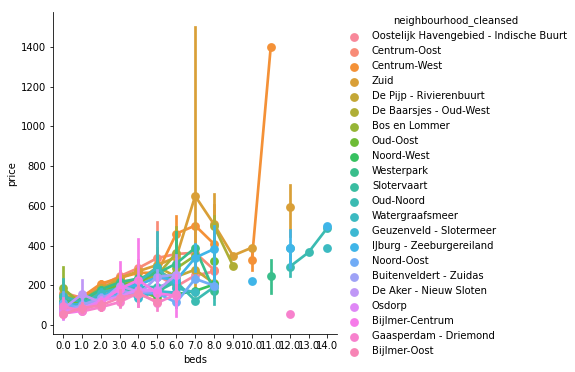

In [ ]:
sns.catplot(x="beds", y="price", hue="neighbourhood_cleansed", kind="point", data=lower_prices.query("beds < 15"))

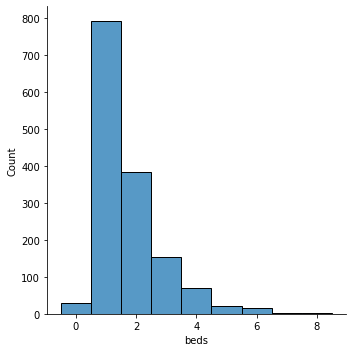

In [ ]:
Centrum_Oost= lower_prices.loc[(lower_prices.neighbourhood_cleansed == 'Centrum-Oost') & (lower_prices.beds <=10)]
sns.displot(Centrum_Oost, x="beds", discrete=True)


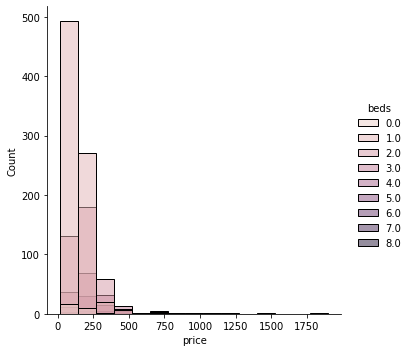

In [ ]:
sns.displot(Centrum_Oost, x="price", hue="beds", bins=15) #use binwidth to specify width


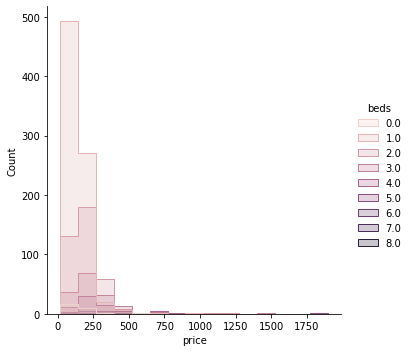

In [ ]:
sns.displot(Centrum_Oost, x="price", hue="beds", bins=15, element="step") 


In [ ]:
No_Beds= lower_prices.loc[(lower_prices.beds < 1)] #shows accomodates is the better data. There are 13 accomodates with 0 that also have NaN for beds/bathrooms etc.
No_Beds


,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
75,247805,https://www.airbnb.com/rooms/247805,20210409161549,2021-04-13,"Bellavista, central,with canal view",Our lovely studio apartment is located near th...,NaN,https://a0.muscache.com/pictures/0fe2ec6c-45c3...,1298735,https://www.airbnb.com/users/show/1298735,...,10.0,10.0,9.0,0363 157A 14AF 5451 77C3,f,1,0,1,0,2.99
176,537321,https://www.airbnb.com/rooms/537321,20210409161549,2021-04-11,Comfortable and pleasant apartment,Nice Amsterdam apartment where you can relax a...,NaN,https://a0.muscache.com/pictures/3395b740-a55e...,2639261,https://www.airbnb.com/users/show/2639261,...,10.0,10.0,9.0,NaN,f,1,1,0,0,0.51
214,590681,https://www.airbnb.com/rooms/590681,20210409161549,2021-04-12,Beautiful apartment near Vondelpark,"Beautiful, large (145 m2) newly renovated 2 s...",The Amstelveense weg is around the corner and ...,https://a0.muscache.com/pictures/707887c0-5aab...,2914846,https://www.airbnb.com/users/show/2914846,...,10.0,9.0,9.0,NaN,t,1,1,0,0,0.10
233,627740,https://www.airbnb.com/rooms/627740,20210409161549,2021-04-12,Canal apartment on Singelgracht,A beautiful sunny canal apartment at top loca...,Just across the bridge is a Jordaan area with ...,https://a0.muscache.com/pictures/07717f32-bc16...,3116801,https://www.airbnb.com/users/show/3116801,...,9.0,10.0,9.0,NaN,f,1,1,0,0,0.05
242,650232,https://www.airbnb.com/rooms/650232,20210409161549,2021-04-11,Most popular neighbourhood of A'Dam,Enjoy A'Dam in the best neighbourhood in town....,NaN,https://a0.muscache.com/pictures/8512822/93c7b...,2841990,https://www.airbnb.com/users/show/2841990,...,9.0,10.0,9.0,NaN,f,1,1,0,0,0.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17746,48372577,https://www.airbnb.com/rooms/48372577,20210409161549,2021-04-12,Typisch Amsterdams huisje,Heerlijk 2 kamer appartement in een typisch Am...,NaN,https://a0.muscache.com/pictures/fe407ed2-d25d...,14204634,https://www.airbnb.com/users/show/14204634,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
17747,48387654,https://www.airbnb.com/rooms/48387654,20210409161549,2021-04-12,Best spot in Amsterdam (Amstel river) renovate...,NaN,NaN,https://a0.muscache.com/pictures/3cd98c8c-e2e5...,73139131,https://www.airbnb.com/users/show/73139131,...,NaN,NaN,NaN,NaN,f,4,0,4,0,NaN
17766,48616475,https://www.airbnb.com/rooms/48616475,20210409161549,2021-04-12,Ruby van Gogh Apartment C,Ruby van Gogh Apartments ligt op minder dan 1 ...,NaN,https://a0.muscache.com/pictures/b47f559f-27d1...,13405827,https://www.airbnb.com/users/show/13405827,...,NaN,NaN,NaN,NaN,t,6,6,0,0,NaN
17779,48708182,https://www.airbnb.com/rooms/48708182,20210409161549,2021-04-11,Cozy apartment with sunny terrace on Javastraat,Lovely apartment in the East of Amsterdam dire...,Javastraat has everything to offer - shops/foo...,https://a0.muscache.com/pictures/4e9f0738-5061...,107863257,https://www.airbnb.com/users/show/107863257,...,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN


In [ ]:
No_Beds2= lower_prices.loc[(lower_prices.accommodates < 1)] 
No_Beds2

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
16798,43077766,https://www.airbnb.com/rooms/43077766,20210409161549,2021-04-10,Hotel Titus,NaN,NaN,https://a0.muscache.com/pictures/3ce7b2c3-64b8...,310397296,https://www.airbnb.com/users/show/310397296,...,NaN,NaN,NaN,NaN,f,1,0,0,0,NaN
16803,43095924,https://www.airbnb.com/rooms/43095924,20210409161549,2021-04-11,Hotel des Arts,NaN,NaN,https://a0.muscache.com/pictures/8bf4b2e9-e28d...,314085766,https://www.airbnb.com/users/show/314085766,...,NaN,NaN,NaN,NaN,f,1,0,0,0,NaN
16804,43095925,https://www.airbnb.com/rooms/43095925,20210409161549,2021-04-12,Acostar Hotel,NaN,NaN,https://a0.muscache.com/pictures/bf0ca576-5659...,311323273,https://www.airbnb.com/users/show/311323273,...,NaN,NaN,NaN,NaN,f,1,0,0,0,NaN
16811,43133999,https://www.airbnb.com/rooms/43133999,20210409161549,2021-04-11,Hotel Manofa,NaN,NaN,https://a0.muscache.com/pictures/fb5ea41f-fbd8...,309225728,https://www.airbnb.com/users/show/309225728,...,NaN,NaN,NaN,NaN,f,1,0,0,0,NaN
16812,43134024,https://www.airbnb.com/rooms/43134024,20210409161549,2021-04-12,Banks Mansion,NaN,NaN,https://a0.muscache.com/pictures/c88da295-a7cf...,316073975,https://www.airbnb.com/users/show/316073975,...,NaN,NaN,NaN,NaN,f,1,0,0,0,NaN
16813,43148414,https://www.airbnb.com/rooms/43148414,20210409161549,2021-04-11,Luxury Suites Amsterdam,NaN,NaN,https://a0.muscache.com/pictures/198187ce-5051...,318649852,https://www.airbnb.com/users/show/318649852,...,NaN,NaN,NaN,NaN,f,3,0,2,0,NaN
16829,43309163,https://www.airbnb.com/rooms/43309163,20210409161549,2021-04-11,Hotel The Craftsmen,NaN,NaN,https://a0.muscache.com/pictures/214a2294-a75d...,312507268,https://www.airbnb.com/users/show/312507268,...,NaN,NaN,NaN,NaN,f,1,0,0,0,NaN
17362,45478851,https://www.airbnb.com/rooms/45478851,20210409161549,2021-04-12,The Delphi - Amsterdam Townhouse,NaN,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,367980459,https://www.airbnb.com/users/show/367980459,...,NaN,NaN,NaN,NaN,f,1,0,0,0,NaN
17503,46273178,https://www.airbnb.com/rooms/46273178,20210409161549,2021-04-12,CitizenM Amsterdam South,NaN,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,374646029,https://www.airbnb.com/users/show/374646029,...,NaN,NaN,NaN,NaN,f,1,0,0,0,NaN
17504,46273734,https://www.airbnb.com/rooms/46273734,20210409161549,2021-04-12,CitizenM Amstel Amsterdam,NaN,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,374649595,https://www.airbnb.com/users/show/374649595,...,NaN,NaN,NaN,NaN,f,1,0,0,0,NaN


In [ ]:
lower_prices.isna().sum()

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
name                                              32
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               2397
Length: 74, dtype: int64

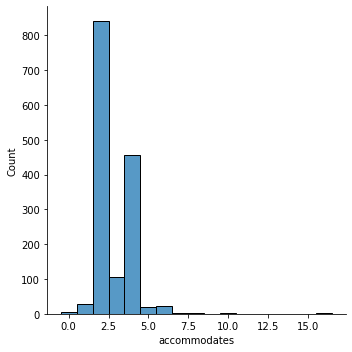

In [ ]:
Centrum_Oost2= lower_prices.loc[(lower_prices.neighbourhood_cleansed == 'Centrum-Oost')]
sns.displot(Centrum_Oost2, x="accommodates", discrete=True)


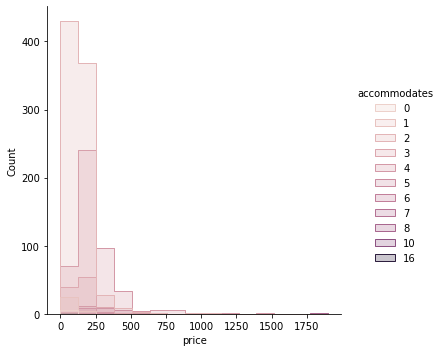

In [ ]:
sns.displot(Centrum_Oost2, x="price", hue="accommodates", bins=15, element="step") 


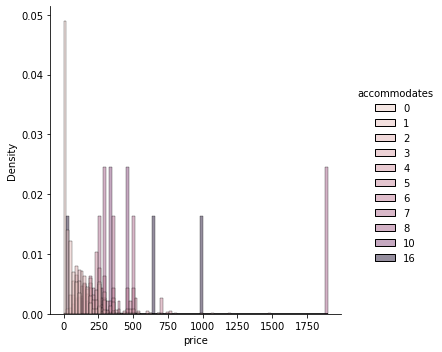

In [ ]:
sns.displot(Centrum_Oost2, x="price", hue="accommodates", stat="density", common_norm=False)


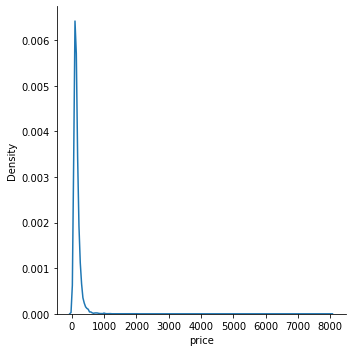

In [ ]:
sns.displot(df, x="price", kind="kde")

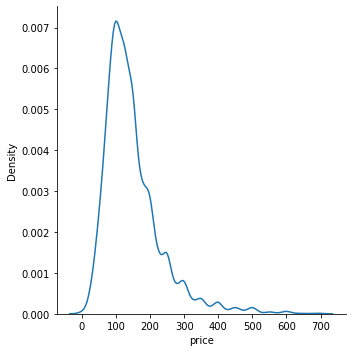

In [ ]:
sns.displot(df.query("price<700"), x="price", kind="kde")

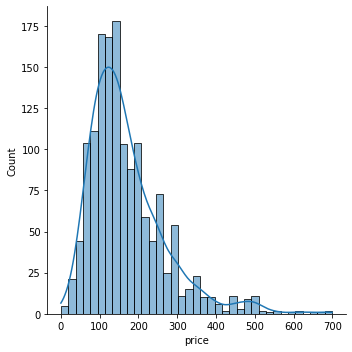

In [ ]:
sns.displot(Centrum_Oost2.query("price<700"), x="price", kde=True)


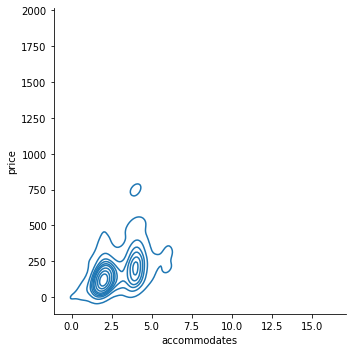

In [ ]:
sns.displot(Centrum_Oost2, x="accommodates", y="price", kind="kde")


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=12efa9a5-d3d7-432c-bbd5-938ba450dd47' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>